## Exploring CNN Architectures on Image Classification

- Objective: Use CNNs to classify images from general-purpose image datasets.
- Dataset: CIFAR-10

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

### Dataset

- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes (6000 images/class). There are 50000 images in the training data, and 10000 images in the testing data.

- Classes are as follows:
1. Airplane
2. Automobile 3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

Load CIFAR-10 Dataset

In [ ]:
(X_train, y_train), (X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

### Data Preprocessing & Visualization

- Reshape y_train and convert it into a 1D array.
- Visualize images in X_train and y_train.
- Normalize the training and testing data.


In [ ]:
#Reshape y_train
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
#Convert y_train from 2D to 1D array
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
def plot(X,y):
    plt.figure(figsize=(7,7))
    for i in range(0,9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X[i])

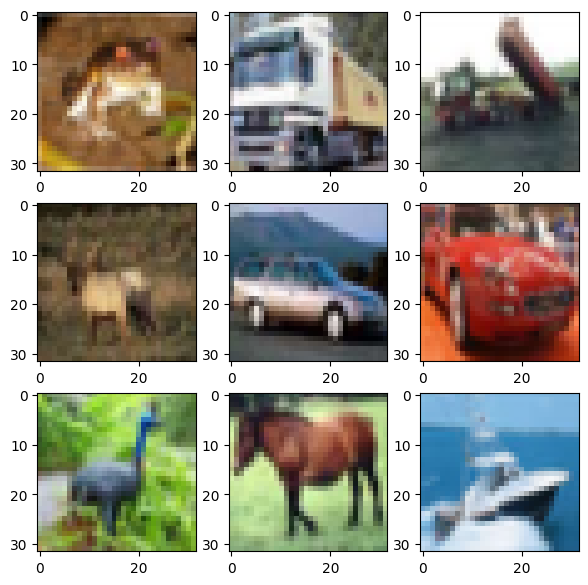

In [ ]:
plot(X_train, y_train)

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

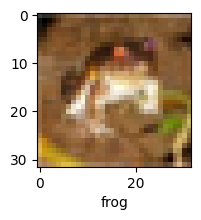

In [ ]:
plot_sample(X_train, y_train, 0)

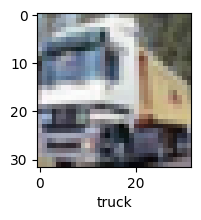

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
#Normalize the training and testing datau
X_train=X_train/255.0
X_test=X_test/255.0

### Model Optimization Techniques

> Overcome challenges

Data Augmentation

> Used ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)


### CNN Model Architecture

> Activation functions: relu and softmax

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


Model Training

- Learning rate scheduler.
- Adam optimizer and default parameters set.
- Early Stopping callback added to prevent overfitting and overtraining.
- Batch_size=32 and epochs=50.

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Train the model
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 53s 24ms/step - loss: 1.7745 - accuracy: 0.3752 - val_loss: 1.6246 - val_accuracy: 0.4351
Epoch 2/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4601 - accuracy: 0.4770 - val_loss: 1.1473 - val_accuracy: 0.6012
Epoch 3/50
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3689 - accuracy: 0.5165 - val_loss: 1.0689 - val_accuracy: 0.6217
Epoch 4/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2958 - accuracy: 0.5416 - val_loss: 1.1525 - val_accuracy: 0.5925
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2558 - accuracy: 0.5583 - val_loss: 1.2264 - val_accuracy: 0.5698
Epoch 6/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2288 - accuracy: 0.5687 - val_loss: 1.0491 - val_accuracy: 0.6324
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1991 - accuracy: 0.5796 - val_loss: 1.0887 -

### Model Evaluation & Prediction

- Testing accuracy of the model is around 72.28%.
- Analyis using classification report, confusion matrix, and heatmap.

In [ ]:
#Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7927 - accuracy: 0.7228
Test accuracy: 0.7228000164031982


In [ ]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[:10]

array([[5.0022043e-03, 5.4781637e-03, 1.6864344e-02, 5.0781703e-01,
        1.0014764e-02, 1.3573861e-01, 2.0387502e-01, 2.4463211e-03,
        9.8759547e-02, 1.4003965e-02],
       [5.4820575e-02, 9.3579672e-02, 1.2085378e-04, 2.1382126e-05,
        8.6796581e-06, 2.0949578e-06, 7.9426318e-06, 2.7074416e-06,
        8.4709859e-01, 4.3375166e-03],
       [1.0147398e-01, 2.8714782e-01, 6.0252063e-03, 7.2996700e-03,
        1.2285167e-03, 1.2239256e-03, 4.2018257e-03, 3.4297246e-03,
        5.6293982e-01, 2.5029510e-02],
       [7.4879164e-01, 4.9998052e-03, 1.1273802e-02, 7.2739524e-04,
        2.6478523e-03, 9.2926100e-05, 4.0127066e-04, 2.4120443e-04,
        2.2979328e-01, 1.0307719e-03],
       [3.9619059e-05, 3.2394190e-04, 1.4022734e-02, 1.8429082e-02,
        4.1771051e-02, 2.0811600e-03, 9.2295676e-01, 1.0847803e-04,
        1.9291109e-04, 7.4272983e-05],
       [3.2829645e-05, 6.1320396e-05, 1.4322925e-03, 1.7541302e-02,
        4.0286169e-03, 4.8392154e-03, 9.7167104e-01, 2.43

In [ ]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

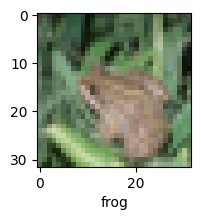

In [ ]:
plot_sample(X_test,y_test,4)

In [ ]:
classes[y_pred_classes[4]]

'frog'

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.84      0.86      0.85      1000
           2       0.62      0.58      0.60      1000
           3       0.60      0.44      0.51      1000
           4       0.75      0.58      0.65      1000
           5       0.65      0.64      0.65      1000
           6       0.67      0.90      0.77      1000
           7       0.74      0.81      0.77      1000
           8       0.82      0.82      0.82      1000
           9       0.79      0.84      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_classes))

Confusion Matrix: 
 [[756  24  45  12   8   3   5  14  84  49]
 [ 14 858   2   2   1   5  12   7  21  78]
 [101   3 579  31  49  62 111  38  11  15]
 [ 28   9  80 444  49 184 120  49  18  19]
 [ 29   2  92  39 581  19 128  97  11   2]
 [ 16   1  52 143  38 638  44  58   2   8]
 [  6   1  34  24  12   7 902   7   3   4]
 [ 15   3  36  25  32  51  16 806   3  13]
 [ 58  48  13  10   2   5   6   5 822  31]
 [ 20  69   5   6   5   4  12  11  26 842]]


In [ ]:
matrix=confusion_matrix(y_test, y_pred_classes)

<Axes: >

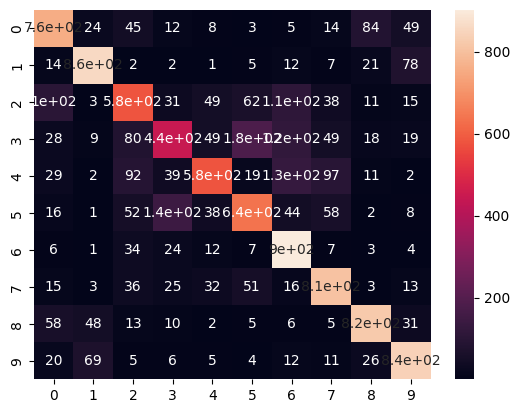

In [ ]:
sns.heatmap(matrix, annot=True)

### Save Model

In [ ]:
import pickle
with open("Model_Prediction.sav", "wb") as f:
    pickle.dump(history,f)

### Conclusion

- The project successfully develops an image classification model using Convolutional Neural Networks (CNNs), utilizing the CIFAR-10 dataset. Through effective data preprocessing, augmentation, and model optimization, the model achieved a test accuracy of approximately 72.28%.
- This demonstrates CNN's capability to classify images across multiple categories, highlighting its potential in image recognition applications. The saved model enables practical implementation, predicting the class of new input images with reasonable accuracy, showcasing CNN’s applicability in real-world image processing tasks.

### Future Scope


1. Experiment with tuning hyperparameters (e.g., learning rate, batch size) to improve model accuracy on the CIFAR-10 dataset.
2. Implement additional augmentation techniques to increase model robustness.
3. Conduct further testing with different datasets to evaluate model consistency and versatility.
4. Deploy the model as a web or mobile application for real-time image classification.